In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json 
import numpy as np
import os
cwd = os.getcwd()


# In[41]:


# The aim of this project is to explore the number and geographic distribution of Ukrainian refugees in Ireland since 2022. 
# I intend to map this to housing data and the Pobal Deprivation Index to explore the relationship between:
# 1. The number of Ukrainian refugees in a given area;
# 2. The current housing stock in that area.
# 3. From this analysis, I intend to plot the increase in the number of refugees in a given area over time in relation to the housing stock in that area and see what insights can be extracted

# First I will import a CSO dataset on the number of Ukrainian refugees who have arrived in each Local Electoral Area in Ireland in 2022 in XLSX format:
ukraine_arrivals_county_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "No. of arrivals")
ua_df1 = pd.DataFrame(ukraine_arrivals_county_xlsx)
ua_df1.head()

# Note that the data in this table is cumulative; the figure in each LEA for each successive month includes the previous figures from previous months.


# In[42]:


# I will filter by December 12th to get the latest figure for each LEA
mask1 = ua_df1["Day"].str.contains("2022 December 12")
ua_df1[mask1].head()


# In[43]:


# Next, I will import another sheet from the same XLSX file with the number of Ukrainian refugees in each LEA as a percentage of the population:
ukraine_arrivals_percentage_of_pop_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Ukraine Arrivals 2022.xlsx", sheet_name = "Arrivals as % of Pop")
ua_df2 = pd.DataFrame(ukraine_arrivals_percentage_of_pop_xlsx)


# In[44]:


# I will filter by December 12th to get the latest figure for each LEA
mask2 = ua_df2["Day"].str.contains("2022 December 12")
ua_df2[mask2].head()


# In[45]:


# I will now merge these tables 
ua_arrivals_overview = pd.merge(ua_df1, ua_df2)
ua_arrivals_overview.dropna()
ua_arrivals_overview.loc[(ua_arrivals_overview["County"] == "Kerry") & (ua_arrivals_overview["Day"] == "2022 December 12")]


# In[46]:


mask3 = ua_arrivals_overview["Day"].str.contains("2022 December 12")
ua_arrivals_overview[mask3].loc[:]


# In[18]:


grouped_counties = ua_arrivals_overview[mask3].groupby(["Day", "County"]).sum("No. of people")
ua_arrivals_overview_grouped = pd.DataFrame(grouped_counties)
ua_arrivals_overview_grouped.loc[:]

No. of people  Unnamed: 4  Unnamed: 5  \
Day              County                                              
2022 December 12  Roscommon          707.0         0.0         0.0   
                 Carlow              872.0         0.0         0.0   
                 Cavan              1258.0         0.0         0.0   
                 Clare              4008.0         0.0         0.0   
                 Cork               6135.0         0.0         0.0   
                 Donegal            4789.0         0.0         0.0   
                 Dublin            11349.0         0.0         0.0   
                 Galway             4025.0         0.0         0.0   
                 Kerry              4743.0         0.0         0.0   
                 Kildare            1063.0         0.0         0.0   
                 Kilkenny           1255.0         0.0         0.0   
                 Laois               789.0         0.0         0.0   
                 Leitrim            1259.0         0.0         0.0   
                 Limerick           2301.0         0.0         0.0   
                 Longford            429.0         0.0         0.0   
                 Louth              1640.0         0.0         0.0   
                 Mayo               3169.0         0.0         0.0   
                 Meath              1549.0         0.0         0.0   
                 Monaghan            418.0         0.0         0.0   
                 Offaly              619.0         0.0         0.0   
                 Sligo              1178.0         0.0         0.0   
                 Tipperary          1185.0         0.0         0.0   
                 Waterford          1654.0         0.0         0.0   
                 Westmeath          1464.0         0.0         0.0   
                 Wexford            2329.0         0.0         0.0   
                 Wicklow            1945.0         0.0         0.0   

                             Unnamed: 6  Unnamed: 7  \
Day              County                               
2022 December 12  Roscommon         0.0         0.0   
                 Carlow             0.0         0.0   
                 Cavan              0.0         0.0   
                 Clare              0.0         0.0   
                 Cork               0.0         0.0   
                 Donegal            0.0         0.0   
                 Dublin             0.0         0.0   
                 Galway             0.0         0.0   
                 Kerry              0.0         0.0   
                 Kildare            0.0         0.0   
                 Kilkenny           0.0         0.0   
                 Laois              0.0         0.0   
                 Leitrim            0.0         0.0   
                 Limerick           0.0         0.0   
                 Longford           0.0         0.0   
                 Louth              0.0         0.0   
                 Mayo               0.0         0.0   
                 Meath              0.0         0.0   
                 Monaghan           0.0         0.0   
                 Offaly             0.0         0.0   
                 Sligo              0.0         0.0   
                 Tipperary          0.0         0.0   
                 Waterford          0.0         0.0   
                 Westmeath          0.0         0.0   
                 Wexford            0.0         0.0   
                 Wicklow            0.0         0.0   

                             Percentage (%) of Population  
Day              County                                    
2022 December 12  Roscommon                      2.908529  
                 Carlow                          3.675898  
                 Cavan                           4.612670  
                 Clare                          17.423908  
                 Cork                           16.091175  
                 Donegal                        20.771018  
                 Dublin                        

In [2]:
# The Kenmare entry for Kerry appears to be missing, so that will need to be appended. A bigger problem is that the percentages have been summed, giving incorrect figures. 
# The percentage figures are for each LEA rather than the county as a whole and so cannot be summed.
#I will correct this now by dropping the percentage column from this DataFrame:
ua_arrivals_overview_people_only = ua_arrivals_overview_grouped.drop(columns = "Percentage (%) of Population")
ua_arrivals_overview_people_only.loc[:]

No. of people  Unnamed: 4  Unnamed: 5  \
Day              County                                              
2022 December 12  Roscommon          707.0         0.0         0.0   
                 Carlow              872.0         0.0         0.0   
                 Cavan              1258.0         0.0         0.0   
                 Clare              4008.0         0.0         0.0   
                 Cork               6135.0         0.0         0.0   
                 Donegal            4789.0         0.0         0.0   
                 Dublin            11349.0         0.0         0.0   
                 Galway             4025.0         0.0         0.0   
                 Kerry              4743.0         0.0         0.0   
                 Kildare            1063.0         0.0         0.0   
                 Kilkenny           1255.0         0.0         0.0   
                 Laois               789.0         0.0         0.0   
                 Leitrim            1259.0         0.0         0.0   
                 Limerick           2301.0         0.0         0.0   
                 Longford            429.0         0.0         0.0   
                 Louth              1640.0         0.0         0.0   
                 Mayo               3169.0         0.0         0.0   
                 Meath              1549.0         0.0         0.0   
                 Monaghan            418.0         0.0         0.0   
                 Offaly              619.0         0.0         0.0   
                 Sligo              1178.0         0.0         0.0   
                 Tipperary          1185.0         0.0         0.0   
                 Waterford          1654.0         0.0         0.0   
                 Westmeath          1464.0         0.0         0.0   
                 Wexford            2329.0         0.0         0.0   
                 Wicklow            1945.0         0.0         0.0   

                             Unnamed: 6  Unnamed: 7  
Day              County                              
2022 December 12  Roscommon         0.0         0.0  
                 Carlow             0.0         0.0  
                 Cavan              0.0         0.0  
                 Clare              0.0         0.0  
                 Cork               0.0         0.0  
                 Donegal            0.0         0.0  
                 Dublin             0.0         0.0  
                 Galway             0.0         0.0  
                 Kerry              0.0         0.0  
                 Kildare            0.0         0.0  
                 Kilkenny           0.0         0.0  
                 Laois              0.0         0.0  
                 Leitrim            0.0         0.0  
                 Limerick           0.0         0.0  
                 Longford           0.0         0.0  
                 Louth              0.0         0.0  
                 Mayo               0.0         0.0  
                 Meath              0.0         0.0  
                 Monaghan           0.0         0.0  
                 Offaly             0.0         0.0  
                 Sligo              0.0         0.0  
                 Tipperary          0.0         0.0  
                 Waterford          0.0         0.0  
                 Westmeath          0.0         0.0  
                 Wexford            0.0         0.0  
                 Wicklow            0.0         0.0

In [3]:
# Now to append the value for Kerry by replacing 4743 with 6493 (4743 + 1750 which is the missing total no. of arrivals in Kenmare):
ua_arrivals_overview_people_appended = ua_arrivals_overview_people_only.replace(to_replace = 4743, value = 6493)
ua_arrivals_overview_people_appended.loc[:]

No. of people  Unnamed: 4  Unnamed: 5  \
Day              County                                              
2022 December 12  Roscommon          707.0         0.0         0.0   
                 Carlow              872.0         0.0         0.0   
                 Cavan              1258.0         0.0         0.0   
                 Clare              4008.0         0.0         0.0   
                 Cork               6135.0         0.0         0.0   
                 Donegal            4789.0         0.0         0.0   
                 Dublin            11349.0         0.0         0.0   
                 Galway             4025.0         0.0         0.0   
                 Kerry              6493.0         0.0         0.0   
                 Kildare            1063.0         0.0         0.0   
                 Kilkenny           1255.0         0.0         0.0   
                 Laois               789.0         0.0         0.0   
                 Leitrim            1259.0         0.0         0.0   
                 Limerick           2301.0         0.0         0.0   
                 Longford            429.0         0.0         0.0   
                 Louth              1640.0         0.0         0.0   
                 Mayo               3169.0         0.0         0.0   
                 Meath              1549.0         0.0         0.0   
                 Monaghan            418.0         0.0         0.0   
                 Offaly              619.0         0.0         0.0   
                 Sligo              1178.0         0.0         0.0   
                 Tipperary          1185.0         0.0         0.0   
                 Waterford          1654.0         0.0         0.0   
                 Westmeath          1464.0         0.0         0.0   
                 Wexford            2329.0         0.0         0.0   
                 Wicklow            1945.0         0.0         0.0   

                             Unnamed: 6  Unnamed: 7  
Day              County                              
2022 December 12  Roscommon         0.0         0.0  
                 Carlow             0.0         0.0  
                 Cavan              0.0         0.0  
                 Clare              0.0         0.0  
                 Cork               0.0         0.0  
                 Donegal            0.0         0.0  
                 Dublin             0.0         0.0  
                 Galway             0.0         0.0  
                 Kerry              0.0         0.0  
                 Kildare            0.0         0.0  
                 Kilkenny           0.0         0.0  
                 Laois              0.0         0.0  
                 Leitrim            0.0         0.0  
                 Limerick           0.0         0.0  
                 Longford           0.0         0.0  
                 Louth              0.0         0.0  
                 Mayo               0.0         0.0  
                 Meath              0.0         0.0  
                 Monaghan           0.0         0.0  
                 Offaly             0.0         0.0  
                 Sligo              0.0         0.0  
                 Tipperary          0.0         0.0  
                 Waterford          0.0         0.0  
                 Westmeath          0.0         0.0  
                 Wexford            0.0         0.0  
                 Wicklow            0.0         0.0

In [6]:
# Now I'm going to create a chart for the top 5 counties by number of Ukrainians living there (Dublin, Kerry, Cork, Donegal, and Galway). 
# First, I need to create a dictionary for each county with the number of Ukrainians living there in each month.
# For this use case, I feel that it's qucker to pull the numbers from Excel, and I also want to demonstrate converting a dictionary into a chart;
# Therefore, I will simpply copy the numbers into my dictionaries:
dublin_ukrainians_by_month = {"May" : 5909, "June": 7479, "July": 9310, "August": 9644, "September": 10469, "October" : 10469, "November": 11108, "December": 11349}


In [7]:
# I can now use Dublin as a template to quickly create the other dictionaries:
kerry_ukrainians_by_month = {"May" : 2248, "June": 2796, "July": 3027, "August": 3448, "September": 4717, "October" : 4717, "November": 5796, "December": 6493}
cork_ukrainians_by_month = {"May" : 2959, "June": 3828, "July": 4385, "August": 4682, "September": 5054, "October" : 5054, "November": 5475, "December": 6135}
donegal_ukrainians_by_month = {"May" : 1236, "June": 1683, "July": 1884, "August": 2298, "September": 3740, "October" : 3740, "November": 4441, "December": 4789}
galway_ukrainians_by_month = {"May" : 1585, "June": 2358, "July": 2790, "August": 3206, "September": 3291, "October" : 3291, "November": 3611, "December": 4025}

In [8]:
# Now to create a DataFrame combining all these dictionaries:
D_UA_df = pd.DataFrame( data = dublin_ukrainians_by_month, index = ["Dublin"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [9]:
KY_UA_df = pd.DataFrame( data = kerry_ukrainians_by_month, index = ["Kerry"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [10]:
C_UA_df = pd.DataFrame( data = cork_ukrainians_by_month, index = ["Cork"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [11]:
DL_UA_df = pd.DataFrame( data = donegal_ukrainians_by_month, index = ["Donegal"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [12]:
G_UA_df = pd.DataFrame( data = galway_ukrainians_by_month, index = ["Galway"], columns = ["May", "June", "July", "August", "September", "October", "November", "December"])

In [13]:
top_5_counties = [D_UA_df, KY_UA_df, C_UA_df, DL_UA_df, G_UA_df]

In [14]:
top_5_df = pd.concat(top_5_counties)

In [15]:
top_5_df.loc[:]

,May,June,July,August,September,October,November,December
Dublin,5909,7479,9310,9644,10469,10469,11108,11349
Kerry,2248,2796,3027,3448,4717,4717,5796,6493
Cork,2959,3828,4385,4682,5054,5054,5475,6135
Donegal,1236,1683,1884,2298,3740,3740,4441,4789
Galway,1585,2358,2790,3206,3291,3291,3611,4025


In [16]:
top_5_df.index.name = "County"
top_5_df.loc[:]

,May,June,July,August,September,October,November,December
County,,,,,,,,
Dublin,5909,7479,9310,9644,10469,10469,11108,11349
Kerry,2248,2796,3027,3448,4717,4717,5796,6493
Cork,2959,3828,4385,4682,5054,5054,5475,6135
Donegal,1236,1683,1884,2298,3740,3740,4441,4789
Galway,1585,2358,2790,3206,3291,3291,3611,4025


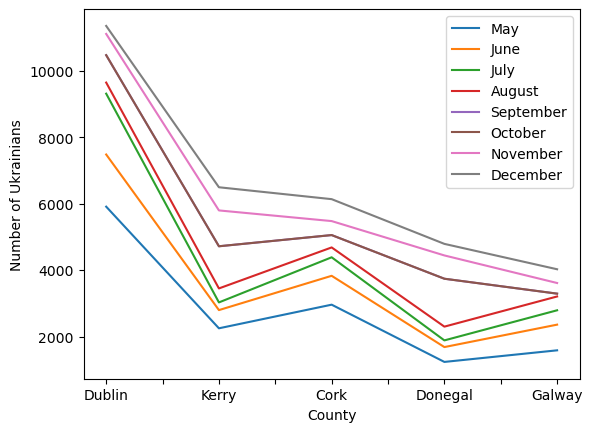

In [30]:
# I'm going to use Matplotlib to create a line plot of the data now:
fig, ax = plt.subplots()
top_5_df.plot(ax=ax)
ax.set_xlabel("County")
ax.set_ylabel("Number of Ukrainians")
plt.show()

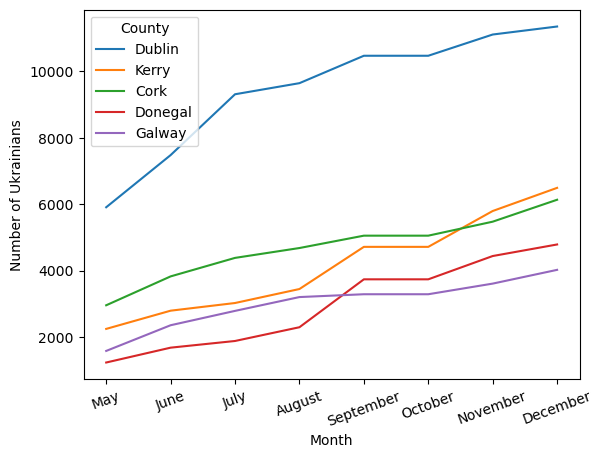

In [37]:
# This plot is not easy to understand in this format, so I'm going to transpose it to make it clearer:
top_5_df_transposed = top_5_df.T
fig, ax = plt.subplots()
top_5_df_transposed.plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Ukrainians")
ax.set_xticks(range(len(top_5_df_transposed.index)))
ax.set_xticklabels(top_5_df_transposed.index)
ax.set_xticklabels(top_5_df_transposed.index, rotation=20, fontsize=10)
plt.show()


In [ ]:
# Much better! This plot shows the clear difference between the number of Ukrainian refugees living in Dublin versus the next highest counties. 
# It also shows a more or less steady upward trend in numbers in all counties from May to December.

# It's interesting that Kerry overtook Cork in 2nd place between October and November; why is this?
# I suspect it could be due to the availability of holiday homes, as Kerry has a large number of these.
# Holiday homes are typically vacant in the winter months and thus could potentially be used for temporary refugee accommodation, so this could be an explanation.
# To investigate, I will create a DataFrame with these 5 counties and the number of vacant holiday homes in each from May-December 2022.
# I will then create a plot with this data, similar to above, and see what I find.
# Of course, correlation does not equal causation, so I will have to corroborate any such finding with other sources.

In [46]:
# First I will import another CSV file downloaded from the CSO website with data on the number of unoccupied holiday homes in Ireland in 2022:
holiday_homes_xlsx  = pd.read_excel(r"C:\Users\andyb\OneDrive\Documents\Holiday Homes and Vacant Dwelling Data.xlsx", sheet_name = "Data Cleaned")
holiday_homes_df1 = pd.DataFrame(holiday_homes_xlsx)
holiday_homes_df1.loc[:]

,Administrative County,Type,Number
0,Ireland,Unoccupied Holiday Homes,66135
1,Dublin City,Unoccupied Holiday Homes,753
2,Cork County,Unoccupied Holiday Homes,7089
3,Donegal,Unoccupied Holiday Homes,12377
4,Mayo,Unoccupied Holiday Homes,5911
...,...,...,...
59,Monaghan,Vacant Dwellings,2873
60,Offaly,Vacant Dwellings,2663
61,Laois,Vacant Dwellings,2650
62,Longford,Vacant Dwellings,2338


In [47]:
# Time to clean this DataFrame.
# I'll start by removing the Vacant Dwelling rows:
holiday_homes_df2 = holiday_homes_df1[holiday_homes_df1['Type'] != 'Vacant Dwellings']
holiday_homes_df2.loc[:]

,Administrative County,Type,Number
0,Ireland,Unoccupied Holiday Homes,66135
1,Dublin City,Unoccupied Holiday Homes,753
2,Cork County,Unoccupied Holiday Homes,7089
3,Donegal,Unoccupied Holiday Homes,12377
4,Mayo,Unoccupied Holiday Homes,5911
5,Galway County,Unoccupied Holiday Homes,4252
6,Kerry,Unoccupied Holiday Homes,8716
7,Limerick City and County,Unoccupied Holiday Homes,642
8,Tipperary,Unoccupied Holiday Homes,1095
9,Wexford,Unoccupied Holiday Homes,5977


In [58]:
# Next, I'll remove the other counties so that we're only left with the administrative counties that comprise Dublin, Cork, Kerry, Donegal, and Galway:
county_list = county_list = ['Cork County', 'Donegal', 'Galway County', 'Kerry', 'Dún Laoghaire-Rathdown', 'Cork City', 'Fingal', 'South Dublin', 'Galway City']
holiday_homes_filtered_df3 = holiday_homes_df2.loc[holiday_homes_df2['Administrative County'].isin(county_list)]
holiday_homes_filtered_df3.loc[:]

,Administrative County,Type,Number
2,Cork County,Unoccupied Holiday Homes,7089
6,Kerry,Unoccupied Holiday Homes,8716
11,Dún Laoghaire-Rathdown,Unoccupied Holiday Homes,442
12,Cork City,Unoccupied Holiday Homes,191
13,Fingal,Unoccupied Holiday Homes,434
20,South Dublin,Unoccupied Holiday Homes,81
25,Galway City,Unoccupied Holiday Homes,594


In [116]:
# Dublin City, Donegal, and Galway County are missing from the dataframe, so I will append them manually:
missing_counties = {"Dublin City": 753, "Donegal": 12377, "Galway County": 4252}
missing_counties_df = pd.DataFrame({'Administrative County': ['Dublin City', 'Donegal', 'Galway County'], 'Type': ['Unoccupied Holiday Homes', 'Unoccupied Holiday Homes', 'Unoccupied Holiday Homes'], 'Number': [753, 12377, 4252]})
missing_counties_df = missing_counties_df.reset_index(drop=True)
holiday_homes_df4 = pd.concat([holiday_homes_filtered_df3, missing_counties_df], ignore_index=True)

# I'm dropping the "Type" column because it's irrelevant and starting to annoy me:
holiday_homes_df4 = holiday_homes_df4.drop(columns=['Type'])
holiday_homes_df4.loc[:]

,Administrative County,Number
0,Cork County,7089
1,Kerry,8716
2,Dún Laoghaire-Rathdown,442
3,Cork City,191
4,Fingal,434
5,South Dublin,81
6,Galway City,594
7,Dublin City,753
8,Donegal,12377
9,Galway County,4252


In [117]:
# Now we need to add the values for city and county:
holiday_homes_df5 = holiday_homes_df4.groupby('Administrative County', as_index=False)['Number'].sum()
dublin_mask = holiday_homes_df5['Administrative County'].isin(['Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin'])
selected_rows = holiday_homes_df5[dublin_mask]
dublin_row = pd.DataFrame({'Administrative County': ['Dublin'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df5 = holiday_homes_df5.drop(holiday_homes_df5[dublin_mask].index)
holiday_homes_df5 = pd.concat([holiday_homes_df5, dublin_row])
holiday_homes_df5.loc[:]


,Administrative County,Number
0,Cork City,191
1,Cork County,7089
2,Donegal,12377
6,Galway City,594
7,Galway County,4252
8,Kerry,8716
0,Dublin,1710


In [118]:
holiday_homes_df6 = holiday_homes_df5.groupby('Administrative County', as_index=False)['Number'].sum()
cork_mask = holiday_homes_df6['Administrative County'].isin(['Cork City', 'Cork County'])
selected_rows = holiday_homes_df6[cork_mask]
cork_row = pd.DataFrame({'Administrative County': ['Cork'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df6 = holiday_homes_df6.drop(holiday_homes_df6[cork_mask].index)
holiday_homes_df6 = pd.concat([holiday_homes_df6, cork_row])
holiday_homes_df6.loc[:]


,Administrative County,Number
2,Donegal,12377
3,Dublin,1710
4,Galway City,594
5,Galway County,4252
6,Kerry,8716
0,Cork,7280


In [121]:
holiday_homes_df7 = holiday_homes_df5.groupby('Administrative County', as_index=False)['Number'].sum()
galway_mask = holiday_homes_df7['Administrative County'].isin(['Galway City', 'Galway County'])
selected_rows = holiday_homes_df7[galway_mask]
galway_row = pd.DataFrame({'Administrative County': ['Galway'], 'Number': [selected_rows['Number'].sum()]})
holiday_homes_df7 = holiday_homes_df6.drop(holiday_homes_df7[galway_mask].index)
holiday_homes_df7 = pd.concat([holiday_homes_df7, galway_row])
holiday_homes_df7.loc[:]

,Administrative County,Number
2,Donegal,12377
3,Dublin,1710
6,Kerry,8716
0,Cork,7280
0,Galway,4846


<AxesSubplot:xlabel='Administrative County', ylabel='Number'>

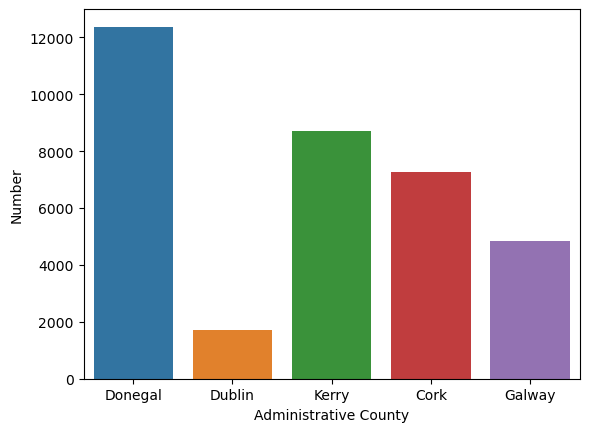

In [124]:
# A quick bar plot will help visualise this data:
sns.barplot(x='Administrative County', y='Number', data=holiday_homes_df7)

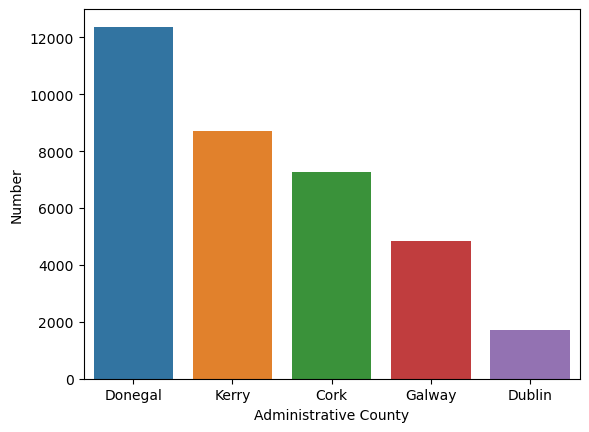

In [128]:
# I want to reorder the bars from largest to smallest to be more aesthetically pleasing:
holiday_homes_df7_sorted = holiday_homes_df7.sort_values(by='Number', ascending=False)
sns.barplot(x='Administrative County', y='Number', data=holiday_homes_df7_sorted)
plt.show()